In [1]:
import Pkg
Pkg.activate(joinpath(@__DIR__, ".."))
Pkg.instantiate()

  Activating project at `~/Projects/Astrodynamics/EphemerisSources.jl/paper`


In [38]:
using EphemerisSources
using AstroTime, Dates

start = AstroTime.TTEpoch(now())
stop = start + 1years
step = "1 day"
wrt = "SEMB-L2"
units = "KM-S"

earth = ephemeris("earth", start, stop, step; wrt=wrt, units=units)
JWST = ephemeris("jwst", start, stop, step; wrt=wrt, units=units)
GAIA = ephemeris("gaia", start, stop, step; wrt=wrt, units=units)

(t = [2.460548419591042e6, 2.460549419591042e6, 2.460550419591042e6, 2.460551419591042e6, 2.460552419591042e6, 2.460553419591042e6, 2.460554419591042e6, 2.460555419591042e6, 2.460556419591042e6, 2.460557419591042e6  …  2.460904419591042e6, 2.460905419591042e6, 2.460906419591042e6, 2.460907419591042e6, 2.460908419591042e6, 2.460909419591042e6, 2.460910419591042e6, 2.460911419591042e6, 2.460912419591042e6, 2.460913419591042e6], cal = InlineStrings.String31[" A.D. 2024-Aug-25 22:04:12.6660", " A.D. 2024-Aug-26 22:04:12.6660", " A.D. 2024-Aug-27 22:04:12.6660", " A.D. 2024-Aug-28 22:04:12.6660", " A.D. 2024-Aug-29 22:04:12.6660", " A.D. 2024-Aug-30 22:04:12.6660", " A.D. 2024-Aug-31 22:04:12.6660", " A.D. 2024-Sep-01 22:04:12.6660", " A.D. 2024-Sep-02 22:04:12.6660", " A.D. 2024-Sep-03 22:04:12.6660"  …  " A.D. 2025-Aug-16 22:04:12.6660", " A.D. 2025-Aug-17 22:04:12.6660", " A.D. 2025-Aug-18 22:04:12.6660", " A.D. 2025-Aug-19 22:04:12.6660", " A.D. 2025-Aug-20 22:04:12.6660", " A.D. 2025-A

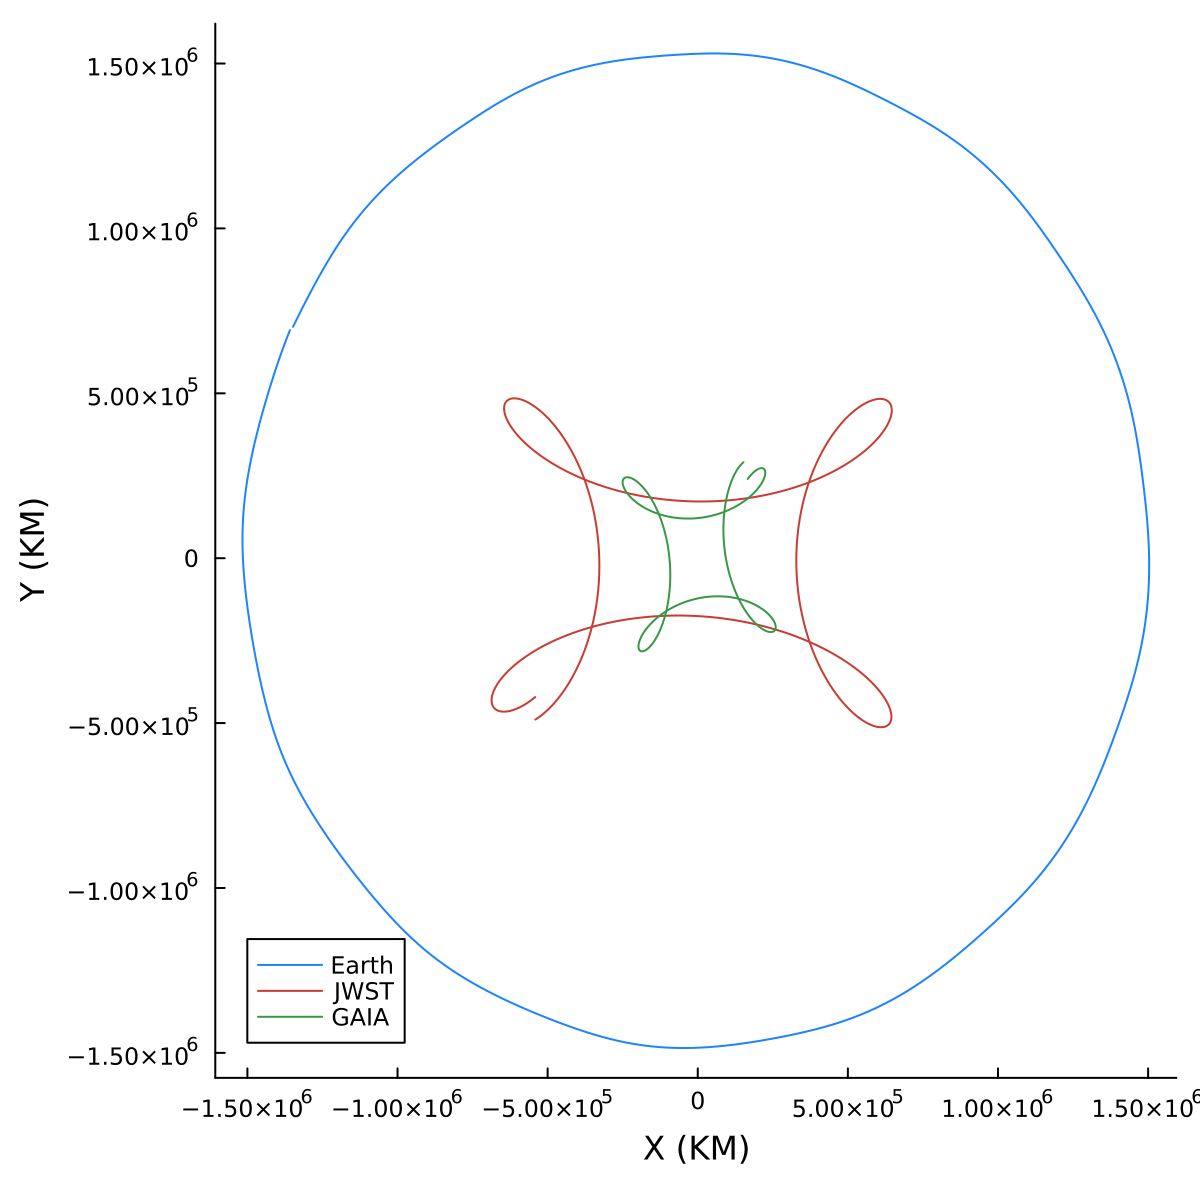

In [54]:
using Plots

artsy = (;
    grid=false,
    label=:none,
    title="",
    markersize=8,
    palette=:julia,
    dpi=200,
    size=(600, 600),
    xlabel = "X (KM)",
    ylabel = "Y (KM)"
)

fig = plot(; artsy...)
plot!(fig, earth.x, earth.y, label="Earth")
plot!(fig, JWST.x, JWST.y, label="JWST")
plot!(fig, GAIA.x, GAIA.y, label="GAIA")

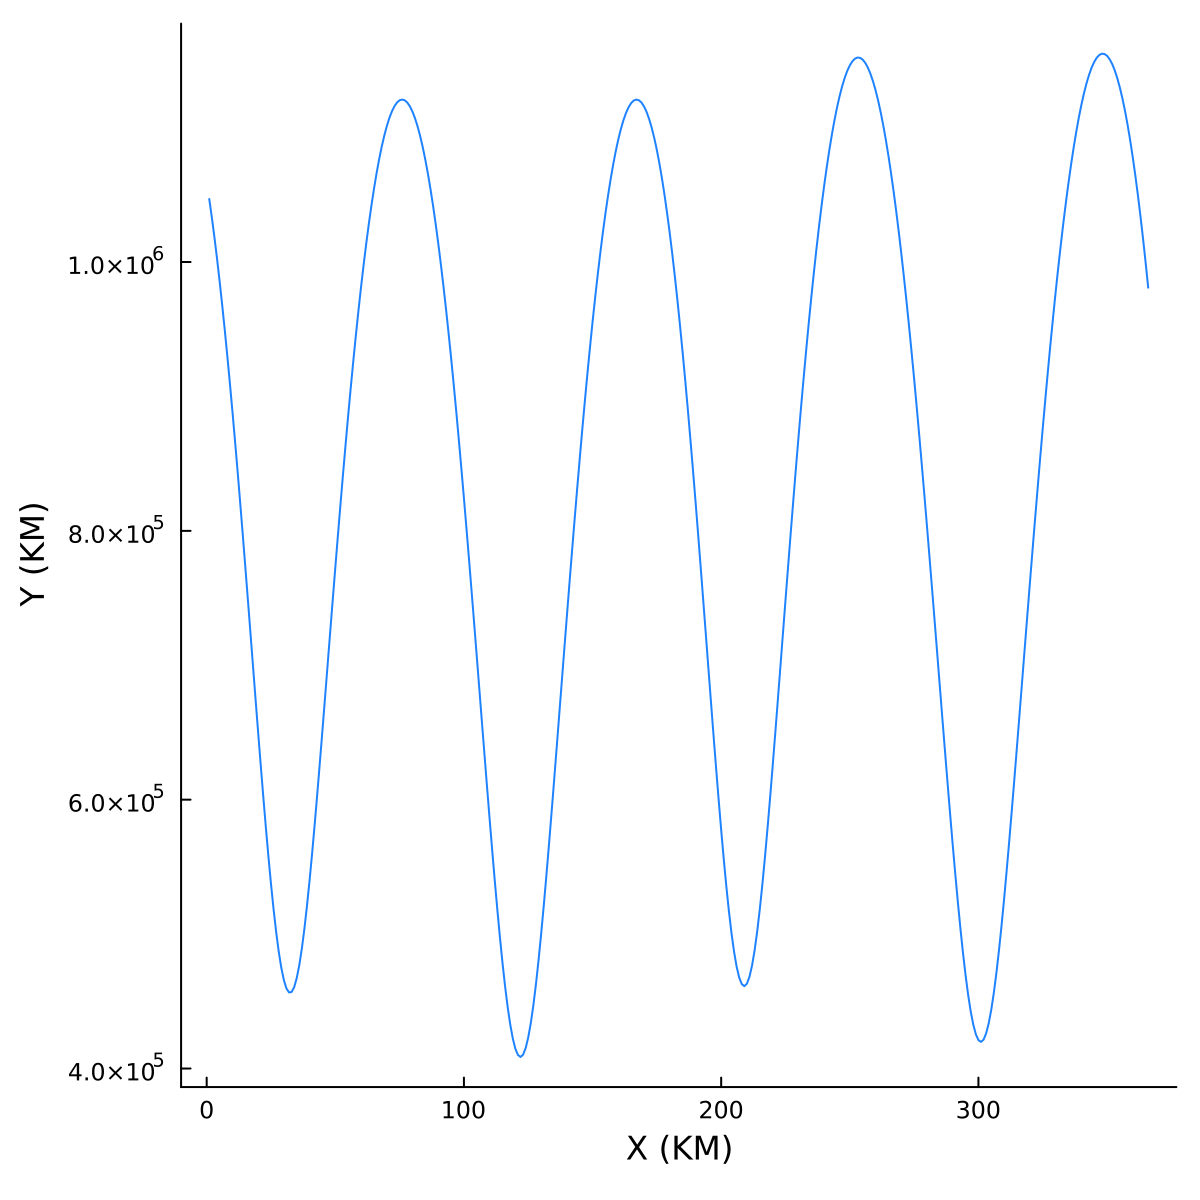

In [57]:
using Dates 

fig = plot(; artsy...)

distance(x, y, z) = sqrt(x^2 + y^2 + z^2)

plot!(
    fig,
    collect(1:length(earth.cal)),
    @. distance(JWST.x - GAIA.x, JWST.y - GAIA.y, JWST.z - GAIA.z);
    label = nothing
)

fig